# Creating pipeline

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import os
import shutil
import numpy as np
import cv2

In [23]:
images = tf.data.Dataset.list_files('/content/data/images/*',shuffle=False)

In [24]:
images.as_numpy_iterator().next()

b'/content/data/images/001e762f-245a-11ed-a3a2-c83dd4876380.jpg'

In [25]:
def load_image(img_path):
  byte_img=tf.io.read_file(img_path)
  img=tf.io.decode_jpeg(byte_img)
  return img

In [26]:
images=images.map(load_image)

In [27]:
images.as_numpy_iterator().next()

array([[[245, 251, 251],
        [242, 248, 246],
        [249, 255, 251],
        ...,
        [ 53,  58,  61],
        [ 50,  58,  61],
        [ 57,  64,  70]],

       [[242, 248, 248],
        [244, 250, 248],
        [251, 255, 253],
        ...,
        [106, 112, 112],
        [ 87,  92,  96],
        [ 70,  75,  79]],

       [[234, 243, 240],
        [239, 248, 245],
        [244, 253, 248],
        ...,
        [159, 161, 158],
        [146, 147, 149],
        [126, 130, 133]],

       ...,

       [[ 40,  26,  39],
        [ 39,  25,  38],
        [ 38,  24,  37],
        ...,
        [ 35,  25,  34],
        [ 38,  28,  37],
        [ 41,  31,  40]],

       [[ 36,  25,  39],
        [ 36,  25,  39],
        [ 34,  23,  37],
        ...,
        [ 34,  26,  37],
        [ 35,  27,  38],
        [ 37,  29,  40]],

       [[ 34,  26,  41],
        [ 33,  25,  40],
        [ 31,  23,  38],
        ...,
        [ 34,  26,  37],
        [ 33,  25,  36],
        [ 34,  26,  37]]

In [28]:
img_generator=images.batch(4).as_numpy_iterator()
plot_img=img_generator.next()

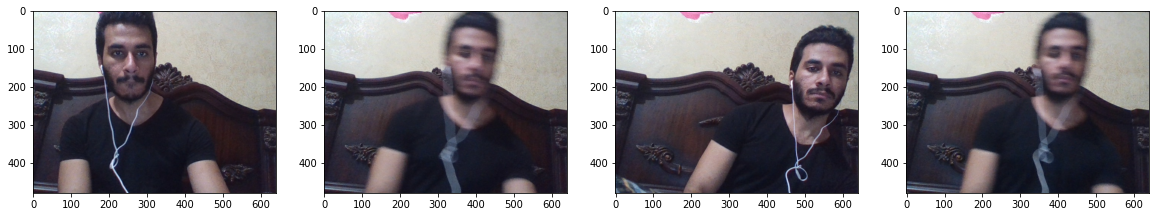

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(plot_img):
  ax[idx].imshow(img)
plt.show()

In [30]:
imgs_path='/content/data/images'
labels_path='/content/data/labels'
train_path_l='/content/data/train/labels'
test_path_l='/content/data/test/labels'
val_path_l='/content/data/val/labels'
train_path='/content/data/train/images'
test_path='/content/data/test/images'
val_path='/content/data/val/images'


In [31]:
imgs_shuffled=random.sample(os.listdir(imgs_path),58)
imgs_train=imgs_shuffled[0:40]
imgs_test=imgs_shuffled[40:50]
imgs_val=imgs_shuffled[50:59]
[shutil.copy(imgs_path+'/'+i,train_path) for i in imgs_train]
[shutil.move(imgs_path+'/'+j,test_path) for j in imgs_test]
[shutil.move(imgs_path+'/'+k,val_path) for k in imgs_val]



['/content/data/val/images/2f1e13cb-245a-11ed-af12-c83dd4876380.jpg',
 '/content/data/val/images/07c335dc-245a-11ed-a40c-c83dd4876380.jpg',
 '/content/data/val/images/02aad869-245a-11ed-84a7-c83dd4876380.jpg',
 '/content/data/val/images/05d98d0b-245a-11ed-9f37-c83dd4876380.jpg',
 '/content/data/val/images/32a27a46-245a-11ed-946c-c83dd4876380.jpg',
 '/content/data/val/images/30672c15-245a-11ed-807e-c83dd4876380.jpg',
 '/content/data/val/images/034bf519-245a-11ed-888c-c83dd4876380.jpg',
 '/content/data/val/images/2f6fb9f0-245a-11ed-b556-c83dd4876380.jpg']

In [32]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

# Augmention

In [33]:
import albumentations as alb

In [34]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

# Apply on test image

In [48]:
img =cv2.imread('/content/data/train/images/039d5488-245a-11ed-a696-c83dd4876380.jpg')

In [50]:
import json
with open('/content/data/train/labels/039d5488-245a-11ed-a696-c83dd4876380.json','r') as f:
    l=json.load(f)

In [51]:
coord=[0,0,0,0]
coord[0]=l['shapes'][0]['points'][0][0]
coord[1]=l['shapes'][0]['points'][0][1]
coord[2]=l['shapes'][0]['points'][1][0]
coord[3]=l['shapes'][0]['points'][1][1]


In [52]:
coords = list(np.divide(coord, [640,480,640,480]))

In [53]:
coords

[0.6189958756345177,
 0.05499153976311336,
 0.8775618654822335,
 0.5414551607445008]

In [54]:
augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [55]:
augmented

{'image': array([[[154, 159, 190],
         [154, 162, 194],
         [158, 164, 196],
         ...,
         [ 65,  45,  58],
         [ 67,  48,  62],
         [ 67,  46,  63]],
 
        [[154, 159, 190],
         [157, 162, 194],
         [157, 164, 196],
         ...,
         [ 69,  49,  63],
         [ 73,  54,  67],
         [ 74,  54,  70]],
 
        [[153, 158, 190],
         [156, 160, 192],
         [157, 162, 194],
         ...,
         [ 69,  48,  64],
         [ 74,  54,  70],
         [ 76,  55,  71]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [214, 216, 216],
         [215, 217, 217],
         [220, 221, 219]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [216, 219, 219],
         [217, 217, 217],
         [220, 220, 220]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [219, 219,

In [56]:
augmented['bboxes']

[(0.5136830231246474,
  0.44911449520586577,
  0.8814213197969543,
  0.9680090242526791)]

In [57]:
import cv2

In [58]:
cv2.rectangle(augmented['image'],tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
                      tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
                      (255,0,0),2)


array([[[154, 159, 190],
        [154, 162, 194],
        [158, 164, 196],
        ...,
        [ 65,  45,  58],
        [ 67,  48,  62],
        [ 67,  46,  63]],

       [[154, 159, 190],
        [157, 162, 194],
        [157, 164, 196],
        ...,
        [ 69,  49,  63],
        [ 73,  54,  67],
        [ 74,  54,  70]],

       [[153, 158, 190],
        [156, 160, 192],
        [157, 162, 194],
        ...,
        [ 69,  48,  64],
        [ 74,  54,  70],
        [ 76,  55,  71]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [214, 216, 216],
        [215, 217, 217],
        [220, 221, 219]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [216, 219, 219],
        [217, 217, 217],
        [220, 220, 220]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [219, 219, 219],
        [220, 220, 220],
        [222, 222, 222]]

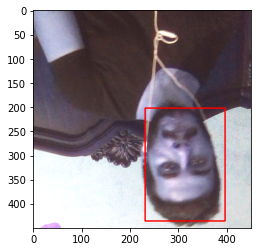

In [59]:
plt.imshow(augmented['image'])

# Augmentation pipeline

In [60]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.22162912436548227, 0.0645093062605753, 0.0, 0.48541666666666666, 'face'].
x_max is less than or equal to x_min for bbox [0.16214308375634517, 0.21679357021996618, 0.0, 0.6708333333333333, 'face'].


# load  data into tf dataset

In [61]:
train_images=tf.data.Dataset.list_files("/content/aug_data/train/images/*.jpg",shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255)

In [62]:
test_images=tf.data.Dataset.list_files("/content/aug_data/test/images/*.jpg",shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x:x/255)

In [63]:
val_images=tf.data.Dataset.list_files("/content/aug_data/val/images/*.jpg",shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x:x/255)

# Load labels into tf dataset

In [64]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']


In [65]:
train_labels=tf.data.Dataset.list_files("/content/aug_data/train/labels/*.json",shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [66]:
test_labels = tf.data.Dataset.list_files('/content/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [67]:
val_labels = tf.data.Dataset.list_files('/content/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [68]:
len(train_images),len(train_labels)

(2280, 2280)

In [69]:
len(test_images),len(test_labels)

(600, 600)

In [70]:
len(val_images),len(val_labels)

(480, 480)

# Combine images with labels

In [71]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(3000)
train = train.batch(8)
train = train.prefetch(4)

In [72]:
test = tf.data.Dataset.zip((test_images, test_labels))
test= test.shuffle(3000)
test= test.batch(8)
test = test.prefetch(4)

In [73]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(3000)
val = val.batch(8)
val = val.prefetch(4)

In [74]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [75]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8), array([[0.0414  , 0.1211  , 0.3833  , 0.549   ],
        [0.6265  , 0.204   , 1.      , 0.6045  ],
        [0.      , 0.1373  , 0.3562  , 0.53    ],
        [0.0426  , 0.4277  , 0.329   , 0.8228  ],
        [0.5244  , 0.4924  , 0.8843  , 0.9956  ],
        [0.08704 , 0.439   , 0.3735  , 0.8335  ],
        [0.      , 0.2196  , 0.3071  , 0.62    ],
        [0.9297  , 0.009705, 1.      , 0.59    ]], dtype=float16))

# Model

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [77]:
vgg = VGG16(include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [78]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [114]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
  
    regress1 = Dense(2048, activation='relu')(f1)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [115]:
facetracker=build_model()

In [116]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_4[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [82]:
X,y=train.as_numpy_iterator().next()

In [83]:
X

array([[[[0.23278186, 0.20257352, 0.2348652 ],
         [0.36973038, 0.32824755, 0.3584559 ],
         [0.5590686 , 0.51593137, 0.53161764],
         ...,
         [0.8392157 , 0.88235295, 0.9019608 ],
         [0.8166054 , 0.8612132 , 0.8661152 ],
         [0.8137255 , 0.85588235, 0.85539216]],

        [[0.61721814, 0.59908086, 0.61329657],
         [0.63210785, 0.6168505 , 0.6197917 ],
         [0.6514093 , 0.63615197, 0.6322304 ],
         ...,
         [0.8439338 , 0.8831495 , 0.87922794],
         [0.90275735, 0.94148284, 0.9375613 ],
         [0.8181372 , 0.85925245, 0.8511642 ]],

        [[0.6123162 , 0.6123162 , 0.60447305],
         [0.64595586, 0.64595586, 0.6381127 ],
         [0.64270836, 0.64270836, 0.6348652 ],
         ...,
         [0.83688724, 0.87218136, 0.8682598 ],
         [0.84411764, 0.8759804 , 0.88235295],
         [0.8273897 , 0.8646446 , 0.8695466 ]],

        ...,

        [[0.07696079, 0.06519608, 0.1004902 ],
         [0.07150735, 0.05974265, 0.09503677]

In [84]:
y

(array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8), array([[0.     , 0.     , 0.     , 0.     ],
        [0.473  , 0.01596, 0.9805 , 0.561  ],
        [0.3413 , 0.4648 , 0.7124 , 0.891  ],
        [0.2588 , 0.4336 , 0.5693 , 0.92   ],
        [0.4863 , 0.     , 0.9126 , 0.463  ],
        [0.02538, 0.4592 , 0.3796 , 0.9126 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.287  , 0.1442 , 0.5737 , 0.539  ]], dtype=float16))

In [86]:
clas,coords=facetracker.predict(X)

In [87]:
clas

array([[0.4800361 ],
       [0.5221062 ],
       [0.46607578],
       [0.44705057],
       [0.45831645],
       [0.44920093],
       [0.4020417 ],
       [0.45843616]], dtype=float32)

In [88]:
coords

array([[0.43726322, 0.45272166, 0.48325095, 0.36090738],
       [0.4961178 , 0.56446224, 0.49469393, 0.3384245 ],
       [0.4536521 , 0.56860536, 0.57754487, 0.33206233],
       [0.43036592, 0.4939513 , 0.5376819 , 0.29444933],
       [0.47366247, 0.49776992, 0.47942126, 0.31563622],
       [0.4985936 , 0.584761  , 0.5431741 , 0.3235084 ],
       [0.42056382, 0.5364695 , 0.518791  , 0.32284975],
       [0.45683983, 0.463256  , 0.51194006, 0.36667156]], dtype=float32)

# Train and loss

In [117]:
batches_per_epoch=len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [118]:
opt=tf.optimizers.Adam(learning_rate=0.0001,decay=lr_decay)

In [119]:
def localization_loss(y_true,y_predict):
  delta_coord=tf.reduce_sum(tf.square(y_true[:,:2]-y_predict[:,:2]))

  h_true=y_true[:,3]-y_true[:,1]
  w_true=y_true[:,2]-y_true[:,0]

  h_pred=y_predict[:,3]-y_predict[:,1]
  w_pred=y_predict[:,2]-y_predict[:,0]

  delta_size=tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

  return delta_coord+delta_size



In [120]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss


In [121]:
localization_loss(y[1],coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.2633104>

In [122]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [127]:
model = FaceTracker(facetracker)


In [128]:
model.compile(opt, classloss, regressloss)

In [129]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
285/285 [==============================] - 24s 69ms/step - total_loss: 0.0022 - class_loss: 2.9669e-05 - regress_loss: 0.0022 - val_total_loss: 0.9080 - val_class_loss: 0.8571 - val_regress_loss: 0.4795
Epoch 2/10
285/285 [==============================] - 23s 69ms/step - total_loss: 0.0017 - class_loss: 2.3999e-05 - regress_loss: 0.0017 - val_total_loss: 0.0387 - val_class_loss: 1.5623e-04 - val_regress_loss: 0.0386
Epoch 3/10
285/285 [==============================] - 23s 69ms/step - total_loss: 0.0021 - class_loss: 2.2134e-05 - regress_loss: 0.0021 - val_total_loss: 1.5013 - val_class_loss: 1.9885 - val_regress_loss: 0.5070
Epoch 4/10
285/285 [==============================] - 23s 68ms/step - total_loss: 0.0022 - class_loss: 1.9022e-05 - regress_loss: 0.0022 - val_total_loss: 0.0329 - val_class_loss: 1.9187e-04 - val_regress_loss: 0.0328
Epoch 5/10
285/285 [==============================] - 23s 68ms/step - total_loss: 0.0019 - class_loss: 1.7640e-05 - regress_loss: 0.0019

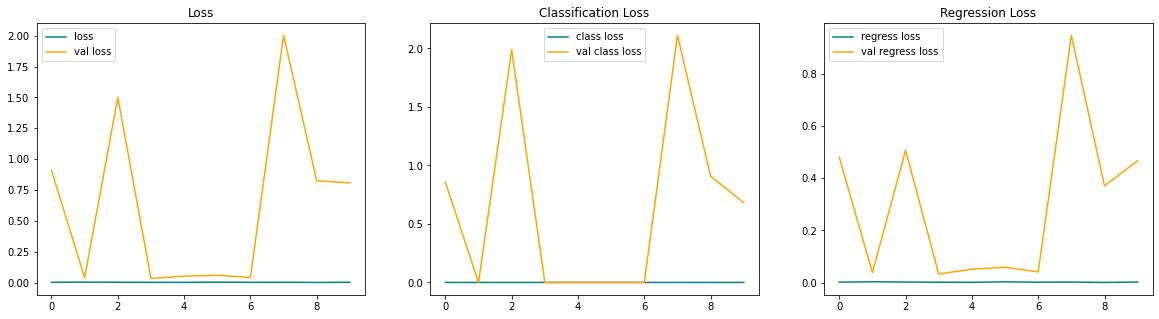

In [131]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# Test

In [143]:
test_sample = test.as_numpy_iterator().next()
yhat = facetracker.predict(test_sample[0])

In [147]:
yhat

[array([[9.9987745e-01],
        [9.9991977e-01],
        [1.0000000e+00],
        [9.9999964e-01],
        [1.0000000e+00],
        [9.9996841e-01],
        [6.0438961e-06],
        [9.9999964e-01]], dtype=float32),
 array([[5.3801948e-01, 4.2929569e-01, 8.7832803e-01, 8.1147951e-01],
        [4.0627757e-01, 1.6019034e-01, 7.4671668e-01, 5.6182045e-01],
        [7.4217212e-01, 6.6263224e-03, 9.9688345e-01, 5.5736816e-01],
        [2.0081918e-03, 9.5721167e-03, 2.1548998e-01, 5.6345046e-01],
        [1.4929159e-02, 4.5931149e-01, 4.8704636e-01, 9.9305737e-01],
        [4.6244705e-01, 4.0353516e-01, 8.1114620e-01, 8.4319592e-01],
        [9.2066970e-04, 1.2534091e-03, 1.5182465e-03, 1.9965351e-03],
        [7.0579797e-02, 3.3720213e-03, 5.1427948e-01, 4.7082689e-01]],
       dtype=float32)]

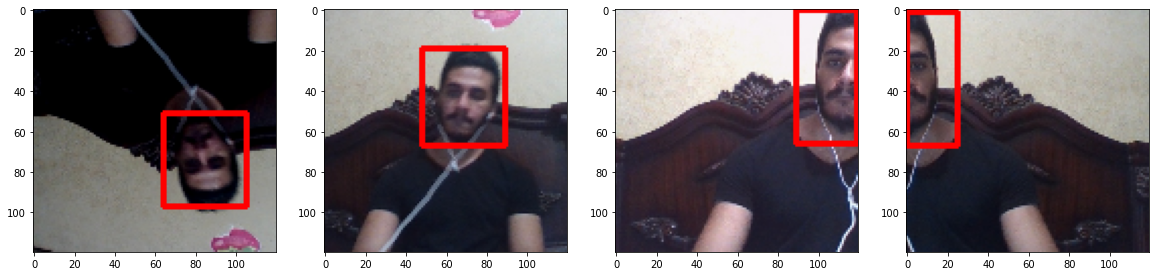

In [144]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

# Save model

In [152]:
from tensorflow.keras.models import load_model
facetracker.save("final_facetracker.h5")